# **Feature Engineering**


A critical part of the successful Machine Learning project is coming up with a good set of features to train on. This process is called feature engineering, and it involves three steps: feature transformation (transforming the original features), feature selection (selecting the most useful features to train on), and feature extraction (combining existing features to produce more useful ones). In this notebook we will explore different tools in Feature Engineering.


## Objectives

After completing this lab you will be able to:

*   Understand the types of Feature Engineering
    *   Feature Transformation
        *   Dealing with Categorical Variables
            *   One Hot Encoding
            *   Label Encoding
        *   Date Time Transformations
    *   Feature Selection
    *   Feature Extraction using Principal Component Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## **Reading and understanding our data**

For this lab, we will be using the airlines_data.xlsx file, hosted on IBM Cloud object. This dataset contains the prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities. This dataset is often used for prediction analysis of the flight prices which are influenced by various factors, such as name of the airline, date of journey, route, departure and arrival times, the source and the destination of the trip, duration and other parameters.

In this notebook, we will use the airlines dataset to perform feature engineering on some of its independent variables.


In [2]:
data = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/airlines_data.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [5]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
data = data.ffill()

In [10]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

## **Feature Transformation**


Feature Transformation means transforming our features to the functions of the original features. For example, feature encoding, scaling, and discretization (the process of transforming continuous variables into discrete form, by creating bins or intervals) are the most common forms of data transformation.


### **Dealing with Categorical Variables**

Categorical variables represent qualitative data with no apparent inherent mathematical meaning. Therefore, for any machine learning analysis, all the categorical data must be transformed into the numerical data types. First, we'll start with 'Airlines' column, as it contains categorical values. We will use `unique()` method to obtain all the categories in this column.


In [9]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

## Exercise 1

In this exercise, use `np.where()` function to combine 'Multiple carriers Premium economy' and 'Multiple carriers' categories, like shown in the code above. Print the newly created list using `unique().tolist()` functions.


In [20]:
test_df = pd.DataFrame([["cat", 1], ["cats", 2], ["dog", 1], ["kittens", 3]], columns=["animal", "count"])
test_df

,animal,count
0,cat,1
1,cats,2
2,dog,1
3,kittens,3


In [22]:
test_df['animal'] = np.where(test_df['animal'] == "cats", "cat", test_df['animal'])
test_df

,animal,count
0,cat,1
1,cat,2
2,dog,1
3,kittens,3


In [24]:
data['Airline'] = np.where(data['Airline'] == 'Multiple carriers Premium economy', 'Multiple carriers', data['Airline'])
data.loc[data['Airline'].str.contains("Multiple carriers Premium")]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


#### **One Hot Encoding**

Now, to be recognized by a machine learning algorithms, our categorical variables should be converted into numerical ones. One way to do this is through *one hot encoding*. To learn more about this process, please visit this [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01).

We will use, `get_dummies()` method to do this transformation. In the next cell, we will transform 'Airline', 'Source', and 'Destination' into their respective numeric variables. We will put all the transformed data into a 'data1' data frame.


In [25]:
data = pd.get_dummies(data=data, columns=['Airline', 'Source', 'Destination'])
data.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,False,True,...,False,False,True,False,True,False,False,False,False,False
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,False,False,...,False,True,False,False,False,True,False,False,False,False
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,False,False,...,False,False,True,False,True,False,False,False,False,False
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,False,False,...,False,False,False,False,False,False,False,False,False,True


In [26]:
dummies_df = pd.DataFrame([["cat", 1], ["cat", 2], ["dog", 1]], columns=["animal", "count"])
dummies_df

,animal,count
0,cat,1
1,cat,2
2,dog,1


In [27]:
one_hot_df = pd.get_dummies(data=dummies_df, columns=["animal"])
one_hot_df

,count,animal_cat,animal_dog
0,1,True,False
1,2,True,False
2,1,False,True


## Exercise 2

In this exercise, use `value_counts()` to determine the values distribution of the 'Total_Stops' parameter.


In [28]:
values = data['Total_Stops'].value_counts()
values.head()

Total_Stops
1 stop      5625
non-stop    3492
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

#### **Label Encoding**

Since 'Total_Stops' is originally a categorical data type, we also need to convert it into numerical one. For this, we can perform a label encoding, where values are manually assigned to the corresponding keys, like "0" to a "non-stop", using the `replace()` function.


In [30]:
data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
data.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,False,True,...,False,False,True,False,True,False,False,False,False,False
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,False,False,...,False,True,False,False,False,True,False,False,False,False
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,False,False,...,False,False,True,False,True,False,False,False,False,False
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,False,False,...,False,False,False,False,False,False,False,False,False,True


In [38]:
duration = list(data['Duration'])
for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())
dur_hours = []
dur_minutes = []  
 
for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
     
 
data['Duration_hours'] = dur_hours
data['Duration_minutes'] =dur_minutes
data.loc[:,'Duration_hours'] *= 60
data['Duration_Total_mins']= data['Duration_hours']+data['Duration_minutes']

data["Dep_Hour"]= pd.to_datetime(data['Dep_Time']).dt.hour
data["Dep_Min"]= pd.to_datetime(data['Dep_Time']).dt.minute
data['dep_timezone'] = pd.cut(data.Dep_Hour, [0,6,12,18,24], labels=['Night','Morning','Afternoon','Evening'])
data["Arrival_Hour"]= pd.to_datetime(data['Arrival_Time']).dt.hour
data['arr_timezone'] = pd.cut(data.Arrival_Hour, [0,6,12,18,24], labels=['Night','Morning','Afternoon','Evening'])
data['Month']= pd.to_datetime(data["Date_of_Journey"], format="%d/%m/%Y").dt.month
data['Day']= pd.to_datetime(data["Date_of_Journey"], format="%d/%m/%Y").dt.day
data['Year']= pd.to_datetime(data["Date_of_Journey"], format="%d/%m/%Y").dt.year
data['day_of_week'] = pd.to_datetime(data['Date_of_Journey']).dt.day_name()

/tmp/ipykernel_12589/3049901873.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Dep_Hour"]= pd.to_datetime(data['Dep_Time']).dt.hour
/tmp/ipykernel_12589/3049901873.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Dep_Min"]= pd.to_datetime(data['Dep_Time']).dt.minute
/tmp/ipykernel_12589/3049901873.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Arrival_Hour"]= pd.to_datetime(data['Arrival_Time']).dt.hour
/tmp/ipykernel_12589/3049901873.py:29: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass 

## **Feature Selection**

Here, we will select only those attributes which best explain the relationship of the independent variables with respect to the target variable, 'price'. There are many methods for feature selection, building the heatmap and calculating the correlation coefficients scores are the most commonly used ones.

First, we will select only the relevant and newly transformed variables (and exclude variables such as 'Route', 'Additional_Info', and all the original categorical variables), and place them into a 'new_data' data frame.


In [42]:
new_data = data.loc[:,['Total_Stops', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Duration_hours', 'Duration_minutes', 'Duration_Total_mins', 'Dep_Hour',
       'Dep_Min', 'Price']]

In [43]:
new_data.head()

,Total_Stops,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Duration_hours,Duration_minutes,Duration_Total_mins,Dep_Hour,Dep_Min,Price
0,0,False,False,False,True,False,False,False,False,False,...,False,False,False,True,120,50,170,22,20,3897
1,2,False,True,False,False,False,False,False,False,False,...,False,False,False,False,420,25,445,5,50,7662
2,2,False,False,False,False,True,False,False,False,False,...,False,False,False,False,1140,0,1140,9,25,13882
3,1,False,False,False,True,False,False,False,False,False,...,False,False,False,False,300,25,325,18,5,6218
4,1,False,False,False,True,False,False,False,False,False,...,False,False,False,True,240,45,285,16,50,13302


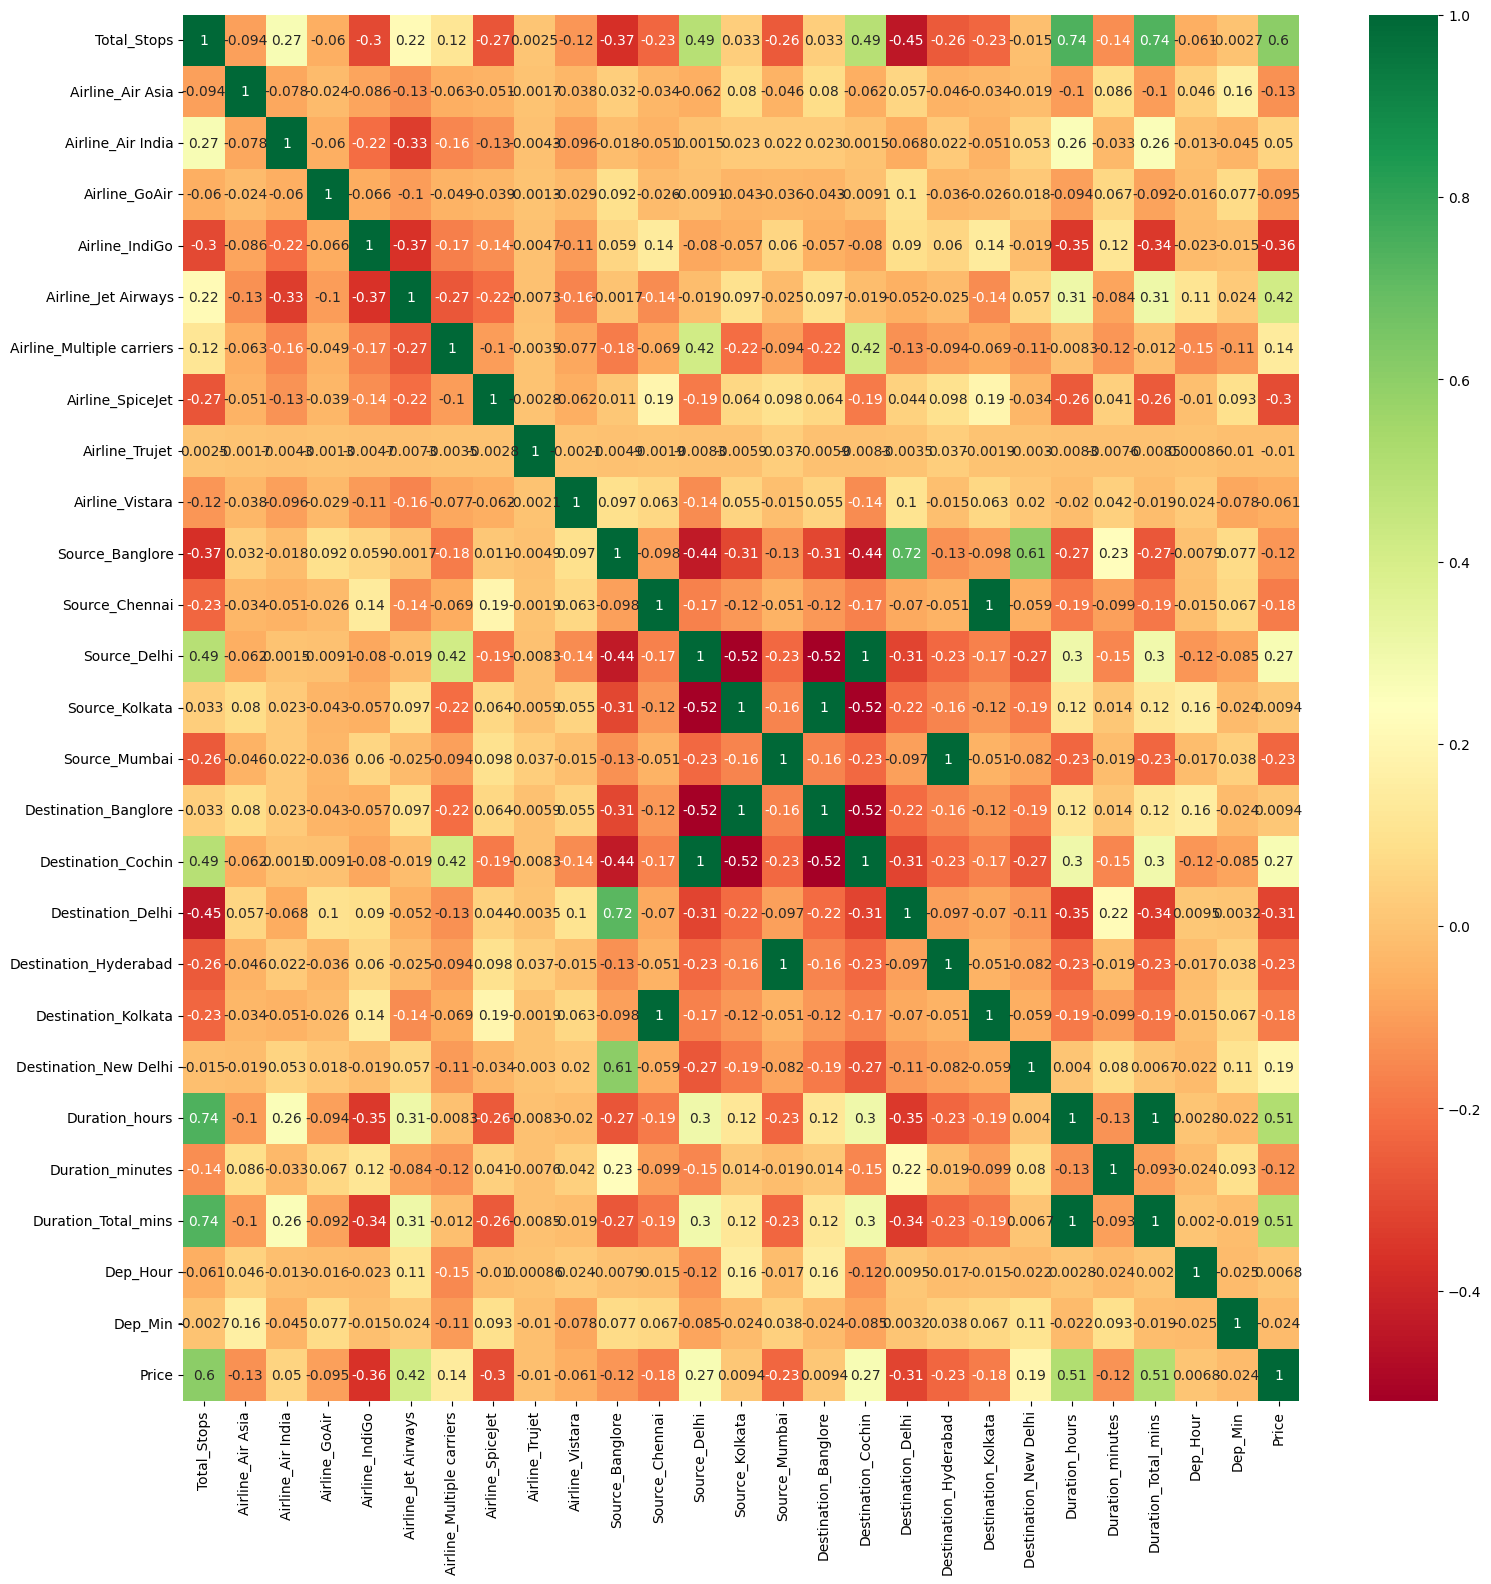

In [44]:
plt.figure(figsize=(18,18))
sns.heatmap(new_data.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [45]:
features = new_data.corr()['Price'].sort_values()
features

Airline_IndiGo              -0.361048
Destination_Delhi           -0.313401
Airline_SpiceJet            -0.296552
Destination_Hyderabad       -0.230745
Source_Mumbai               -0.230745
Destination_Kolkata         -0.179216
Source_Chennai              -0.179216
Airline_Air Asia            -0.133044
Duration_minutes            -0.124874
Source_Banglore             -0.118026
Airline_GoAir               -0.095146
Airline_Vistara             -0.060646
Dep_Min                     -0.024492
Airline_Trujet              -0.010380
Dep_Hour                     0.006819
Source_Kolkata               0.009377
Destination_Banglore         0.009377
Airline_Air India            0.050346
Airline_Multiple carriers    0.141087
Destination_New Delhi        0.189785
Destination_Cochin           0.270619
Source_Delhi                 0.270619
Airline_Jet Airways          0.416135
Duration_Total_mins          0.506371
Duration_hours               0.508672
Total_Stops                  0.603891
Price       

<Axes: >

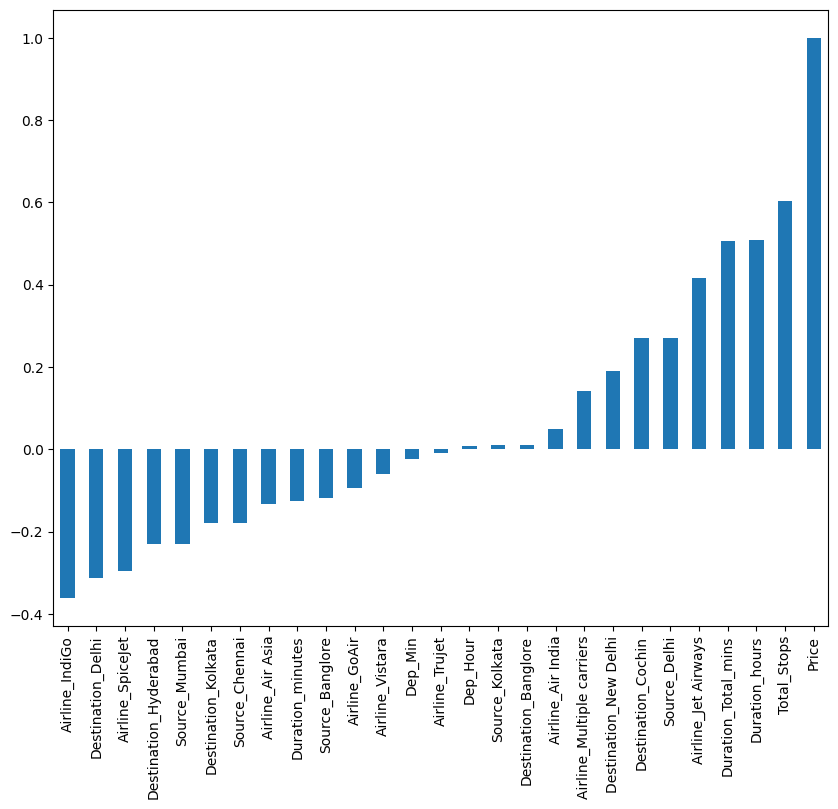

In [46]:
features.plot(kind="bar", figsize=(10, 8))

## **Feature Extraction using Principal Component Analysis (Optional)**

### **PCA with Scikit-Learn**

Dimentionality reduction is part of the feature extraction process that combines the existing features to produce more useful ones. The goal of dimensionality reduction is to simplify the data without loosing too much information. Principal Component Analysis (PCA) is one of the most popular dimensionality reduction algorithms. First, it identifies the hyperplane that lies closest to the data, and then it projects the data onto it. In this way, a few multidimensional features are merged into one.

In the following portion of the lab, we will use `scikit-learn` library to perform some PCA on our data.
To learn more about `scikit-learn` PCA, please visit this [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01#sklearn.decomposition.PCA).


In [51]:
x = data.loc[:,['Total_Stops', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Duration_hours', 'Duration_minutes', 'Duration_Total_mins', 'Dep_Hour',
       'Dep_Min']]
x.head()

,Total_Stops,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Duration_hours,Duration_minutes,Duration_Total_mins,Dep_Hour,Dep_Min
0,0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,120,50,170,22,20
1,2,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,420,25,445,5,50
2,2,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,1140,0,1140,9,25
3,1,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,300,25,325,18,5
4,1,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,240,45,285,16,50


In [52]:
y = data.Price

In [55]:
scaler = StandardScaler()
x = scaler.fit_transform(x.astype(np.float64))
x

array([[-1.22052384, -0.17544122, -0.44291155, ..., -0.93158255,
         1.65425948, -0.23505036],
       [ 1.74150619, -0.17544122,  2.25778713, ..., -0.39007152,
        -1.30309491,  1.36349161],
       [ 1.74150619, -0.17544122, -0.44291155, ...,  0.97847452,
        -0.60724682,  0.0313733 ],
       ...,
       [-1.22052384, -0.17544122, -0.44291155, ..., -0.91189124,
        -0.78120884, -0.23505036],
       [-1.22052384, -0.17544122, -0.44291155, ..., -0.95127386,
        -0.25932278,  0.29779696],
       [ 1.74150619, -0.17544122,  2.25778713, ..., -0.28176932,
        -0.4332848 ,  1.62991527]])

In [56]:
pca = PCA(n_components=2)
pca.fit_transform(x)

array([[-2.87624747, -0.55621977],
       [ 0.3186972 ,  2.39158103],
       [ 3.05949772, -0.52681458],
       ...,
       [-2.24750463, -0.58805577],
       [-2.69657848, -0.28570278],
       [ 1.92508981, -1.10485608]])